# 1 Explore the available backends
Much more examples can be found here: https://qiskit.org/documentation/advanced_use_of_ibm_q_devices.html#advanced-use-of-ibm-q-devices-label

Let's use Jupyter notebook in this exercise. From Anaconda prompt go to directry where you'd like to store your files and type 'jupyter notebook'.

1.1 Provide your token which enables you to use IBM-Q through QISKit

In [1]:
from qiskit import IBMQ

In [2]:
#Earlier IBMQ.save_account('TOKEN') needs to be run
IBMQ.load_accounts()

1.2 Let's list all the available backends

In [3]:
IBMQ.backends(operational=True, simulator=False)

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>]

1.3 Let's choose one of the backends and check it's properties

In [4]:
backend=IBMQ.get_backend('ibmqx4')

In [5]:
backend.status()

BackendStatus(backend_name='ibmqx4', backend_version='1.0.0', operational=True, pending_jobs=5, status_msg='active')

In [6]:
backend.configuration()

BackendConfiguration(allow_q_object=True, backend_name='ibmqx4', backend_version='1.0.0', basis_gates=['u1', 'u2', 'u3', 'cx', 'id'], conditional=False, coupling_map=[[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]], credits_required=True, description='5 qubit device', gates=[GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='id', parameters=[], qasm_def='gate id q { U(0,0,0) q; }'), GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='u1', parameters=['lambda'], qasm_def='gate u1(lambda) q { U(0,0,lambda) q; }'), GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='u2', parameters=['phi', 'lambda'], qasm_def='gate u2(phi,lambda) q { U(pi/2,phi,lambda) q; }'), GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='u3', parameters=['theta', 'phi', 'lambda'], qasm_def='u3(theta,phi,lambda) q { U(theta,phi,lambda) q; }'), GateConfig(coupling_map=[[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]], name='cx', parameters=[], qasm_def='gate cx q1,q2 { CX q1,q2; }')], local=False,

In [7]:
backend.properties()

BackendProperties(backend_name='ibmqx4', backend_version='1.0.0', gates=[Gate(gate='u1', parameters=[Nduv(date=datetime.datetime(2019, 3, 11, 9, 54, 34, tzinfo=tzutc()), name='gate_error', unit='', value=0.0)], qubits=[0]), Gate(gate='u2', parameters=[Nduv(date=datetime.datetime(2019, 3, 11, 9, 54, 34, tzinfo=tzutc()), name='gate_error', unit='', value=0.0007726307293453583)], qubits=[0]), Gate(gate='u3', parameters=[Nduv(date=datetime.datetime(2019, 3, 11, 9, 54, 34, tzinfo=tzutc()), name='gate_error', unit='', value=0.0015452614586907165)], qubits=[0]), Gate(gate='u1', parameters=[Nduv(date=datetime.datetime(2019, 3, 11, 9, 54, 34, tzinfo=tzutc()), name='gate_error', unit='', value=0.0)], qubits=[1]), Gate(gate='u2', parameters=[Nduv(date=datetime.datetime(2019, 3, 11, 9, 54, 34, tzinfo=tzutc()), name='gate_error', unit='', value=0.0009443532335046134)], qubits=[1]), Gate(gate='u3', parameters=[Nduv(date=datetime.datetime(2019, 3, 11, 9, 54, 34, tzinfo=tzutc()), name='gate_error', un

# 2 Construct Bell state using QISKit

In [8]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

We need only 2 qubits, so let's initialize them:

In [9]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

Now let's define what the circuit should look like:

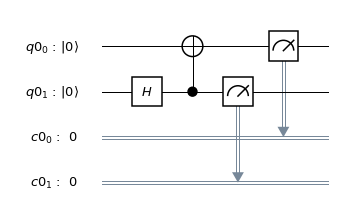

In [10]:
circuit.h(qr[1])
circuit.cx(qr[1], qr[0])
circuit.measure(qr, cr)

%matplotlib inline
circuit.draw(output='mpl')

# 3 Run the algorithm on real quanum computer

In [11]:
job = execute(circuit, backend=backend, shots=1024, max_credits=3)

In [12]:
job.status()

<JobStatus.INITIALIZING: 'job is being initialized'>

In [13]:
job.queue_position()

In [14]:
job.job_id()

'5c842b867df9cd00528a991e'

# 4 Getting the results

In [15]:
result = job.result()

In [16]:
counts=result.get_counts(circuit)

In [17]:
print(counts)

{'10': 78, '11': 417, '01': 98, '00': 431}


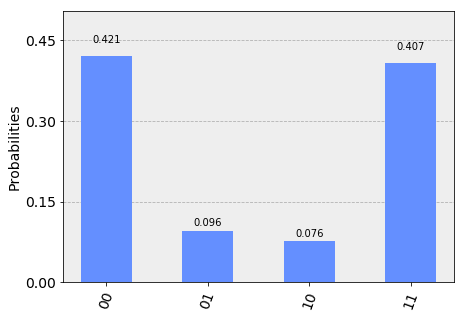

In [20]:
from qiskit.tools.visualization import plot_histogram
%matplotlib inline
plot_histogram(counts)